In [1]:
import requests
import pandas as pd
import numpy as np
import json
import urllib.request
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#set up url and paramters
url = 'https://data.ca.gov/api/3/action/datastore_search'
params = {'resource_id': 'ca5e4758-98a4-4c7c-8b88-1699f010e35b',
          'limit': '147'}

In [3]:
#apply api to get data
fileobj = requests.get(url, params = {'resource_id': 'ca5e4758-98a4-4c7c-8b88-1699f010e35b',
          'limit': '147'})
res = fileobj.json()
result = res['result']
resres = result['records']
df = pd.DataFrame(resres)
df["Year"] = df["Year"].astype(float)
df["Percent"] = df["Percent"].astype(float)
df["Upper 95% CL"] = df["Upper 95% CL"].astype(float)
df["Lower 95% CL"] = df["Lower 95% CL"].astype(float)
df

,Upper 95% CL,Standard Error,Percent,Strata,Strata Name,Year,Lower 95% CL,_id,Geography
0,11.9,0.8,10.4,Total population,Total population,2018.0,8.9,1,California
1,9.9,0.8,8.4,Race-Ethnicity,White,2018.0,6.9,2,California
2,18.6,3.2,12.3,Race-Ethnicity,African-American,2018.0,6.0,3,California
3,13.9,2.7,8.5,Race-Ethnicity,Asian,2018.0,3.2,4,California
4,15.1,1.6,12.1,Race-Ethnicity,Hispanic,2018.0,9.0,5,California
...,...,...,...,...,...,...,...,...,...
142,14.1,1.1,11.9,Income,"$25,000 to $34,999",2012.0,9.8,143,California
143,11.0,0.8,9.5,Income,"$35,000 to $49,999",2012.0,7.9,144,California
144,7.0,0.4,6.3,Income,"$50,000 and above",2012.0,5.6,145,California
145,10.5,0.4,9.7,Sex,Male,2012.0,8.9,146,California


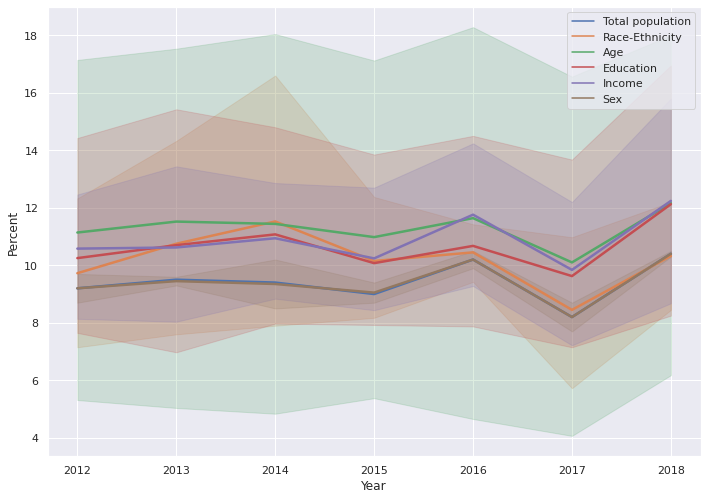

In [ ]:
#a plot of all stratas and their confidence intervals
fig, ax = plt.subplots(1, 1)
sns.lineplot(x = "Year",y = "Percent",data =df, hue = "Strata", linewidth=2.5)
ax.legend(loc = 1)
plt.show()

In [7]:
#total
df_total = df.loc[df['Strata'] == 'Total population']
df_total.head(5)

,Upper 95% CL,Standard Error,Percent,Strata,Strata Name,Year,Lower 95% CL,_id,Geography
0,11.9,0.8,10.4,Total population,Total population,2018.0,8.9,1,California
21,9.1,0.5,8.2,Total population,Total population,2017.0,7.3,22,California
42,10.8,0.4,10.2,Total population,Total population,2016.0,9.6,43,California
63,9.8,0.4,9.0,Total population,Total population,2015.0,8.2,64,California
84,10.2,0.4,9.4,Total population,Total population,2014.0,8.5,85,California


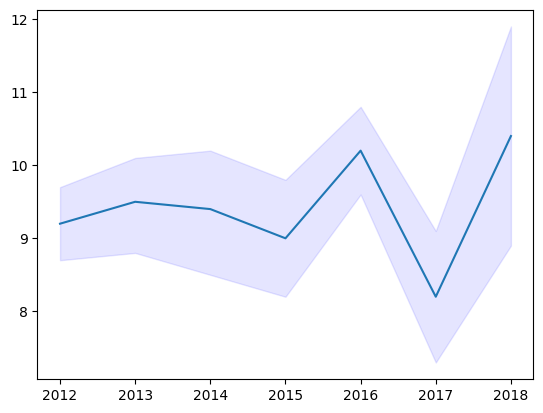

In [8]:
sns.set(rc={'figure.figsize':(11,8)})
fig, ax = plt.subplots(1, 1)
plt.plot(df_total["Year"], df_total['Percent'])
ax.fill_between(df_total["Year"], df_total["Upper 95% CL"], df_total["Lower 95% CL"], color='b', alpha=.1)
plt.show()

This plot shows the fluctation of Diabetes percetage through 2012 to 2018. We cannot summmarize a clear trend just by looking at this graph. However, if we extract the two ends, Year 2018 to Year 2012, a sharp increase is shown. 

In [9]:
#sex
df_sex = df.loc[df['Strata'] == 'Sex']
df_sex.head(5)

,Upper 95% CL,Standard Error,Percent,Strata,Strata Name,Year,Lower 95% CL,_id,Geography
19,12.4,0.9,10.5,Sex,Male,2018.0,8.7,20,California
20,12.7,1.2,10.3,Sex,Female,2018.0,7.9,21,California
40,10.1,0.7,8.7,Sex,Male,2017.0,7.2,41,California
41,8.9,0.6,7.7,Sex,Female,2017.0,6.5,42,California
61,11.2,0.3,10.5,Sex,Male,2016.0,9.6,62,California


In [11]:
#age
df_age = df.loc[df['Strata'] == 'Age']
df_age.head(5)

,Upper 95% CL,Standard Error,Percent,Strata,Strata Name,Year,Lower 95% CL,_id,Geography
5,7.2,1.6,4.0,Age,18 to 34 years,2018.0,0.8,6,California
6,8.3,1.6,5.1,Age,35 to 44 years,2018.0,1.9,7,California
7,15.0,1.7,11.6,Age,45 to 54 years,2018.0,8.2,8,California
8,21.2,1.8,17.7,Age,55 to 64 years,2018.0,14.2,9,California
9,25.3,1.5,22.4,Age,65 years and above,2018.0,19.5,10,California


In [12]:
#race
df_race = df.loc[df['Strata'] == 'Race-Ethnicity']
df_race.head(5)

,Upper 95% CL,Standard Error,Percent,Strata,Strata Name,Year,Lower 95% CL,_id,Geography
1,9.9,0.8,8.4,Race-Ethnicity,White,2018.0,6.9,2,California
2,18.6,3.2,12.3,Race-Ethnicity,African-American,2018.0,6.0,3,California
3,13.9,2.7,8.5,Race-Ethnicity,Asian,2018.0,3.2,4,California
4,15.1,1.6,12.1,Race-Ethnicity,Hispanic,2018.0,9.0,5,California
22,8.8,0.6,7.6,Race-Ethnicity,White,2017.0,6.4,23,California


In [13]:
#income
df_income = df.loc[df['Strata'] == 'Income']
df_income.head(5)

,Upper 95% CL,Standard Error,Percent,Strata,Strata Name,Year,Lower 95% CL,_id,Geography
14,24.5,2.9,18.8,Income,"Less than $15,000",2018.0,13.0,15,California
15,15.3,1.6,12.2,Income,"$15,000 to $24,999",2018.0,9.0,16,California
16,23.5,4.5,14.6,Income,"$25,000 to $34,999",2018.0,5.6,17,California
17,8.7,1.3,6.2,Income,"$35,000 to $49,999",2018.0,3.8,18,California
18,11.7,1.2,9.4,Income,"$50,000 and above",2018.0,7.1,19,California


In [14]:
#Education
df_edu = df.loc[df['Strata'] == 'Education']
df_edu.head(5)

,Upper 95% CL,Standard Error,Percent,Strata,Strata Name,Year,Lower 95% CL,_id,Geography
10,24.1,2.3,19.7,Education,Less than high school,2018.0,15.2,11,California
11,10.9,1.6,7.8,Education,High school graduate,2018.0,4.8,12,California
12,16.2,2.0,12.3,Education,Some college,2018.0,8.4,13,California
13,10.8,1.1,8.7,Education,College graduate,2018.0,6.5,14,California
31,19.0,1.9,15.3,Education,Less than high school,2017.0,11.6,32,California


In [10]:
#define the line plot method
def line(group):
    plt.plot(group["Year"], group["Percent"], label = group.name, alpha = 1)

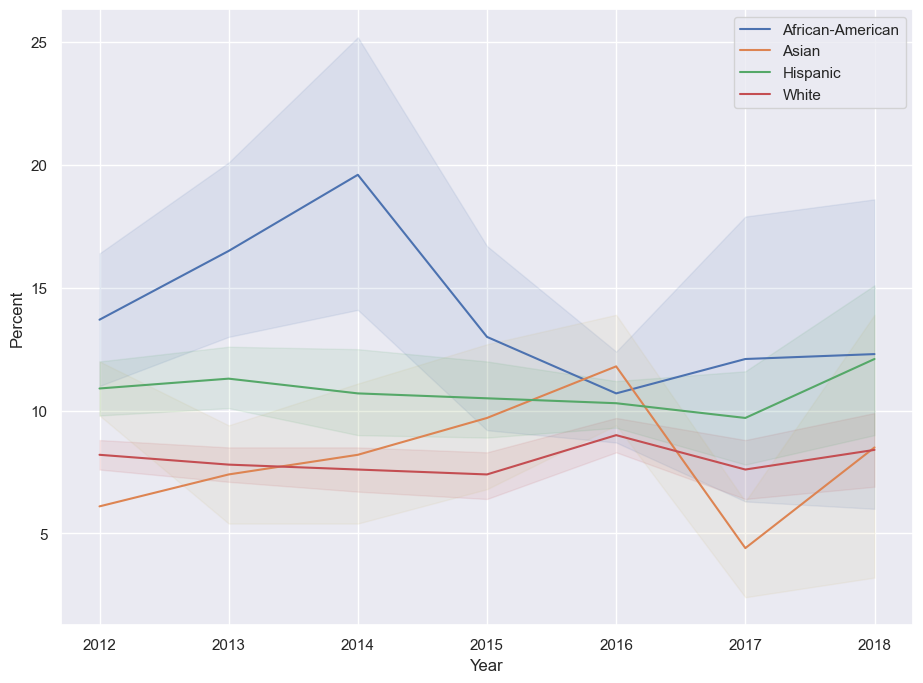

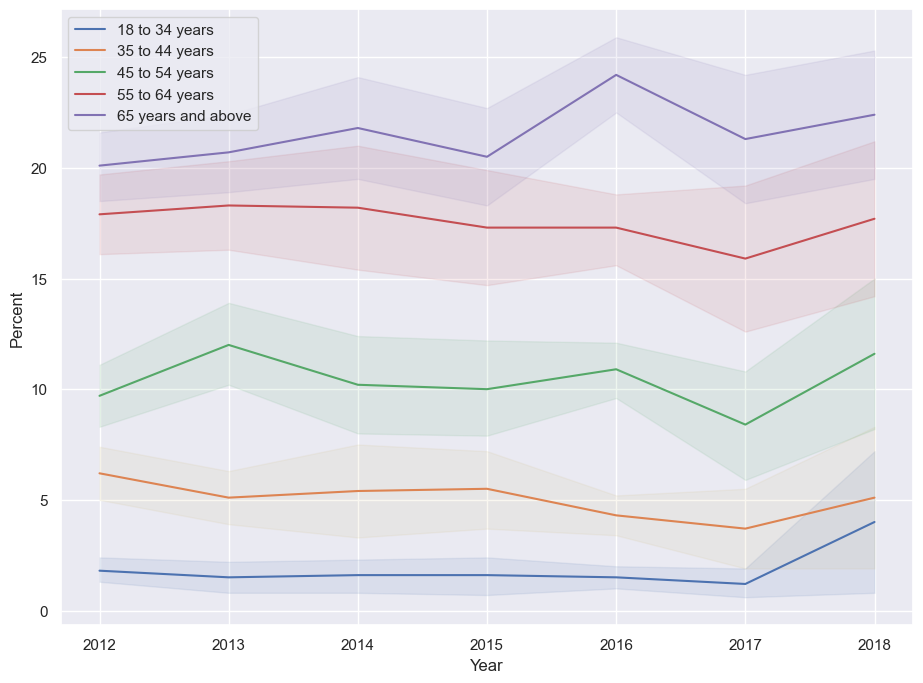

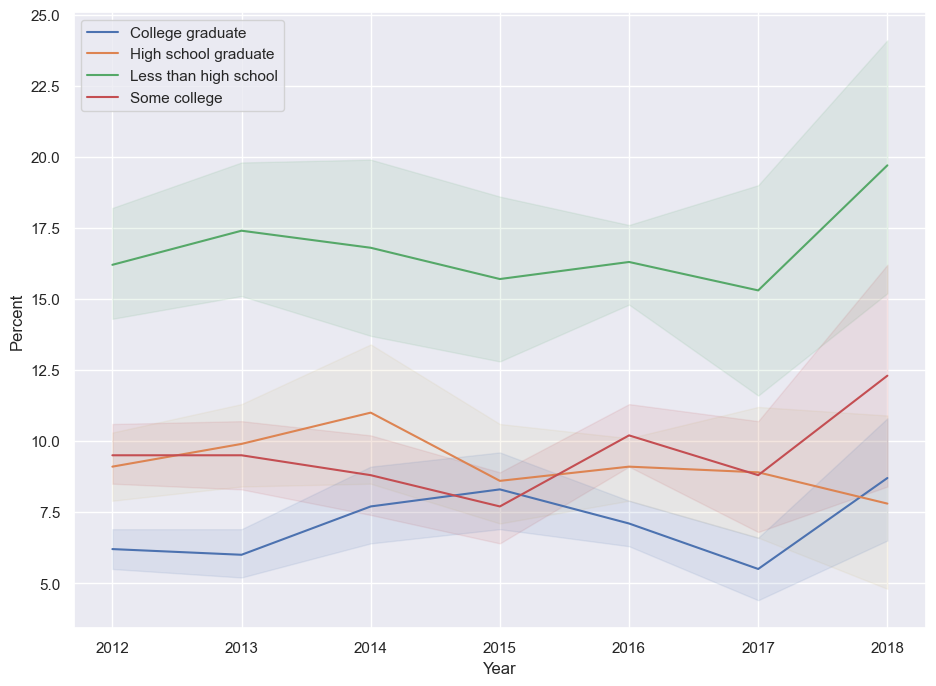

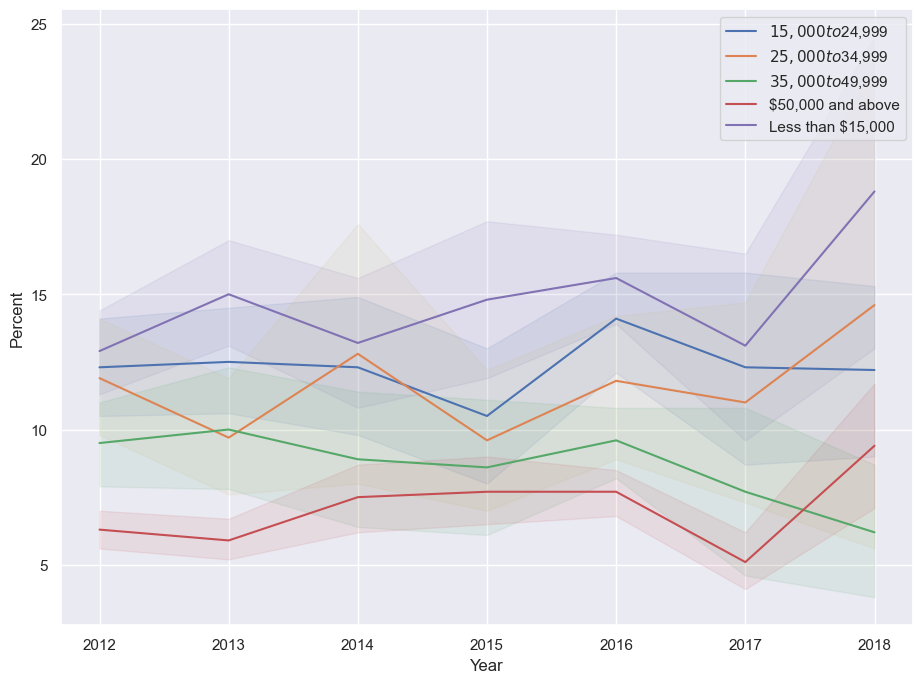

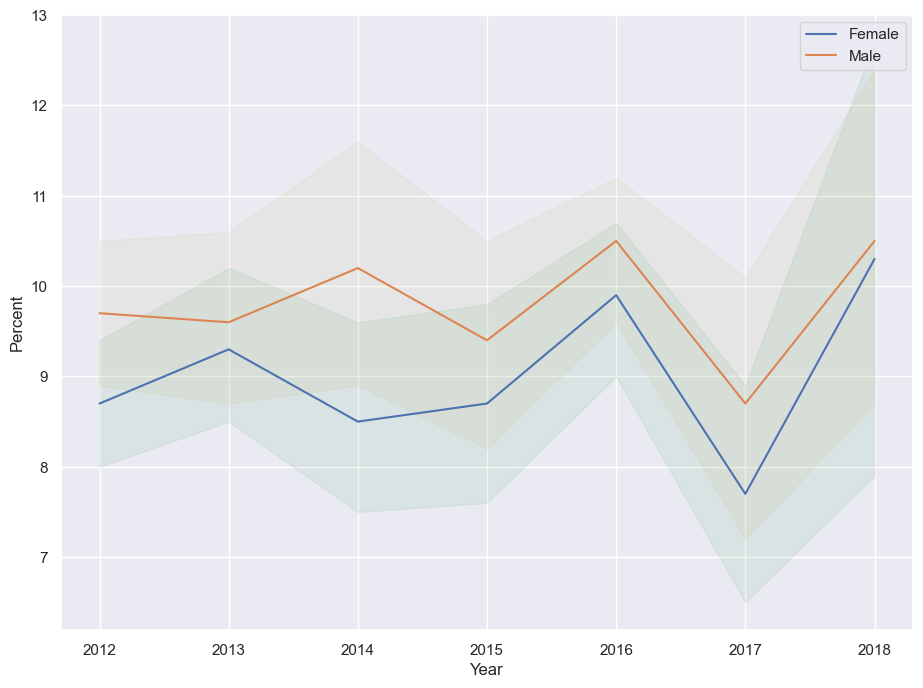

In [18]:
sns.set(rc={'figure.figsize':(11,8)})

#Race plot
fig, ax = plt.subplots(1, 1)
df_race.groupby("Strata Name").apply(line)
ax.set(xlabel = "Year", ylabel = "Percent")
ax.fill_between(df_race.loc[df['Strata Name'] == 'White']["Year"], df_race.loc[df['Strata Name'] == 'White']["Upper 95% CL"], df_race.loc[df['Strata Name'] == 'White']["Lower 95% CL"], color='r', alpha=.1)
ax.fill_between(df_race.loc[df['Strata Name'] == 'African-American']["Year"], df_race.loc[df['Strata Name'] == 'African-American']["Upper 95% CL"], df_race.loc[df['Strata Name'] == 'African-American']["Lower 95% CL"], color='b', alpha=.1)
ax.fill_between(df_race.loc[df['Strata Name'] == 'Asian']["Year"], df_race.loc[df['Strata Name'] == 'Asian']["Upper 95% CL"], df_race.loc[df['Strata Name'] == 'Asian']["Lower 95% CL"], color='y', alpha=.1)
ax.fill_between(df_race.loc[df['Strata Name'] == 'Hispanic']["Year"], df_race.loc[df['Strata Name'] == 'Hispanic']["Upper 95% CL"], df_race.loc[df['Strata Name'] == 'Hispanic']["Lower 95% CL"], color='g', alpha=.1)
ax.legend(loc = 1)
plt.show()


#Age plot
fig, ax = plt.subplots(1, 1)
df_age.groupby("Strata Name").apply(line)
ax.set(xlabel = "Year", ylabel = "Percent")
ax.fill_between(df_age.loc[df['Strata Name'] == '18 to 34 years']["Year"], df_age.loc[df['Strata Name'] == '18 to 34 years']["Upper 95% CL"], df_age.loc[df['Strata Name'] == '18 to 34 years']["Lower 95% CL"], color='b', alpha=.1)
ax.fill_between(df_age.loc[df['Strata Name'] == '35 to 44 years']["Year"], df_age.loc[df['Strata Name'] == '35 to 44 years']["Upper 95% CL"], df_age.loc[df['Strata Name'] == '35 to 44 years']["Lower 95% CL"], color='y', alpha=.1)
ax.fill_between(df_age.loc[df['Strata Name'] == '45 to 54 years']["Year"], df_age.loc[df['Strata Name'] == '45 to 54 years']["Upper 95% CL"], df_age.loc[df['Strata Name'] == '45 to 54 years']["Lower 95% CL"], color='g', alpha=.1)
ax.fill_between(df_age.loc[df['Strata Name'] == '55 to 64 years']["Year"], df_age.loc[df['Strata Name'] == '55 to 64 years']["Upper 95% CL"], df_age.loc[df['Strata Name'] == '55 to 64 years']["Lower 95% CL"], color='r', alpha=.1)
ax.fill_between(df_age.loc[df['Strata Name'] == '65 years and above']["Year"], df_age.loc[df['Strata Name'] == '65 years and above']["Upper 95% CL"], df_age.loc[df['Strata Name'] == '65 years and above']["Lower 95% CL"], color='m', alpha=.1)
ax.legend(loc = 2)
plt.show()


#Education Plot
fig, ax = plt.subplots(1, 1)
df_edu.groupby("Strata Name").apply(line)
ax.set(xlabel = "Year", ylabel = "Percent")
ax.fill_between(df_edu.loc[df['Strata Name'] == 'Less than high school']["Year"], df_edu.loc[df['Strata Name'] == 'Less than high school']["Upper 95% CL"], df_edu.loc[df['Strata Name'] == 'Less than high school']["Lower 95% CL"], color='g', alpha=.1)
ax.fill_between(df_edu.loc[df['Strata Name'] == 'High school graduate']["Year"], df_edu.loc[df['Strata Name'] == 'High school graduate']["Upper 95% CL"], df_edu.loc[df['Strata Name'] == 'High school graduate']["Lower 95% CL"], color='y', alpha=.1)
ax.fill_between(df_edu.loc[df['Strata Name'] == 'Some college']["Year"], df_edu.loc[df['Strata Name'] == 'Some college']["Upper 95% CL"], df_edu.loc[df['Strata Name'] == 'Some college']["Lower 95% CL"], color='r', alpha=.1)
ax.fill_between(df_edu.loc[df['Strata Name'] == 'College graduate']["Year"], df_edu.loc[df['Strata Name'] == 'College graduate']["Upper 95% CL"], df_edu.loc[df['Strata Name'] == 'College graduate']["Lower 95% CL"], color='b', alpha=.1)
ax.legend(loc = 2)
plt.show()


#Income Plot
fig, ax = plt.subplots(1, 1)
df_income.groupby("Strata Name").apply(line)
ax.set(xlabel = "Year", ylabel = "Percent")
ax.fill_between(df_income.loc[df['Strata Name'] == 'Less than $15,000']["Year"], df_income.loc[df['Strata Name'] == 'Less than $15,000']["Upper 95% CL"], df_income.loc[df['Strata Name'] == 'Less than $15,000']["Lower 95% CL"], color='m', alpha=.1)
ax.fill_between(df_income.loc[df['Strata Name'] == '$15,000 to $24,999']["Year"], df_income.loc[df['Strata Name'] == '$15,000 to $24,999']["Upper 95% CL"], df_income.loc[df['Strata Name'] == '$15,000 to $24,999']["Lower 95% CL"], color='b', alpha=.1)
ax.fill_between(df_income.loc[df['Strata Name'] == '$25,000 to $34,999']["Year"], df_income.loc[df['Strata Name'] == '$25,000 to $34,999']["Upper 95% CL"], df_income.loc[df['Strata Name'] == '$25,000 to $34,999']["Lower 95% CL"], color='y', alpha=.1)
ax.fill_between(df_income.loc[df['Strata Name'] == '$35,000 to $49,999']["Year"], df_income.loc[df['Strata Name'] == '$35,000 to $49,999']["Upper 95% CL"], df_income.loc[df['Strata Name'] == '$35,000 to $49,999']["Lower 95% CL"], color='g', alpha=.1)
ax.fill_between(df_income.loc[df['Strata Name'] == '$50,000 and above']["Year"], df_income.loc[df['Strata Name'] == '$50,000 and above']["Upper 95% CL"], df_income.loc[df['Strata Name'] == '$50,000 and above']["Lower 95% CL"], color='r', alpha=.1)
ax.legend(loc = 0)
plt.show()

#sex plot
fig, ax = plt.subplots(1, 1)
df_sex.groupby("Strata Name").apply(line)
ax.set(xlabel = "Year", ylabel = "Percent")
ax.fill_between(df_sex.loc[df['Strata Name'] == 'Male']["Year"], df_sex.loc[df['Strata Name'] == 'Male']["Upper 95% CL"], df_sex.loc[df['Strata Name'] == 'Male']["Lower 95% CL"], color='y', alpha=.1)
ax.fill_between(df_sex.loc[df['Strata Name'] == 'Female']["Year"], df_sex.loc[df['Strata Name'] == 'Female']["Upper 95% CL"], df_sex.loc[df['Strata Name'] == 'Female']["Lower 95% CL"], color='g', alpha=.1)
ax.legend(loc = 0)
plt.show()